In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set()
import missingno as msno

In [5]:
df = pd.read_pickle('../Data/Data_unida.pickle')

In [16]:
df.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,actors,directors
0,None,0.0,"[Drama, Crime]",fi,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,...,"[suomi, Deutsch]",Released,NaN,Ariel,7.1,44.0,1988,0.000000,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki]
1,None,0.0,"[Drama, Comedy]",fi,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,...,"[English, suomi, svenska]",Released,NaN,Shadows in Paradise,7.1,35.0,1986,0.000000,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki]
2,None,4000000.0,"[Crime, Comedy]",en,It's Ted the Bellhop's first night on the job....,9.026586,"[Miramax Films, A Band Apart]",[United States of America],1995-12-09,4300000.0,...,[English],Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,539.0,1995,1.075000,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,None,0.0,"[Action, Thriller, Crime]",en,"While racing to a boxing match, Frank, Mike, J...",5.538671,"[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",1993-10-15,12136938.0,...,[English],Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.4,79.0,1993,0.000000,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]
4,Star Wars Collection,11000000.0,"[Adventure, Action, Science Fiction]",en,Princess Leia is captured and held hostage by ...,42.149697,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,775398007.0,...,[English],Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6778.0,1977,70.490728,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas]


In [4]:
df.dtypes

belongs_to_collection            object
budget                          float64
genres                           object
original_language                object
overview                         object
popularity                      float64
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
release_year                      int64
return                          float64
actors                           object
directors                        object
dtype: object

In [12]:
df.isna().sum()

belongs_to_collection    40954
budget                       0
genres                    2384
original_language           11
overview                   941
popularity                   0
production_companies     11817
production_countries      6219
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3774
status                      80
tagline                  25026
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
actors                    2354
directors                  723
dtype: int64

<AxesSubplot: >

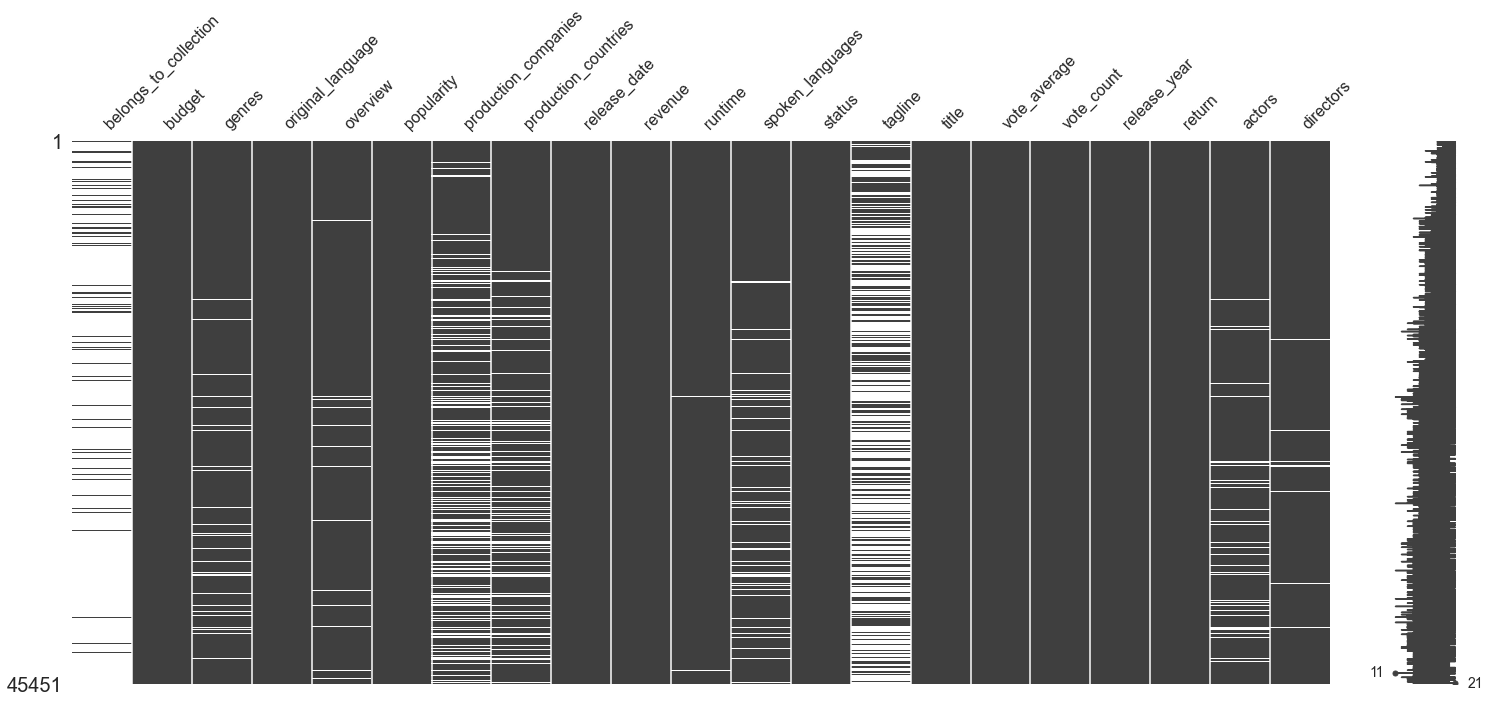

In [7]:
msno.matrix(df)

Este grafico muesta de forma grafica con barras los datos vacios por columna, representando los datos vacios con espacios en blanco en cada barra.

In [11]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.545100e+04,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,45451.000000,4.545100e+04
mean,4.231294e+06,2.926887,1.121930e+07,94.181905,5.624085,109.989703,1991.882027,6.589542e+02
std,1.742942e+07,6.006458,6.433984e+07,38.329504,1.915424,491.352336,24.057726,7.463165e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.389095,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,1.131386,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,3.694370,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


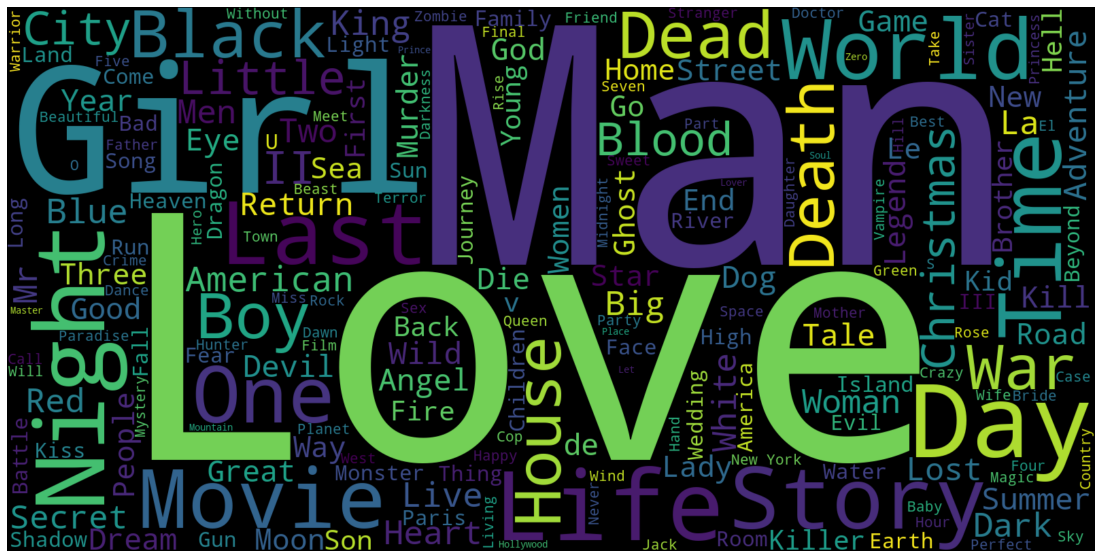

In [13]:
texto = " ".join(df['title'])

wordcloud = WordCloud(width=1600, height=800).generate(texto)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Aqui se muestra las palabras en los nombres de cada pelicula que mas se repiten en la base de datos, mostrando las mas recurrentes en mayor tamaño como Love o Man.

In [17]:
# Separa las columnas con datos numericos de los categoricos en distintos dataframes.
df_numerical = df[['budget','popularity','revenue','runtime','vote_average','vote_count','return']]
df_categorical = df[['title','directors']]

In [18]:
df_numerical.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,return
0,0.0,3.860491,0.0,69.0,7.1,44.0,0.000000
1,0.0,2.292110,0.0,76.0,7.1,35.0,0.000000
2,4000000.0,9.026586,4300000.0,98.0,6.5,539.0,1.075000
3,0.0,5.538671,12136938.0,110.0,6.4,79.0,0.000000
4,11000000.0,42.149697,775398007.0,121.0,8.1,6778.0,70.490728


In [19]:
# Funcion para graficos de caja
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.xlabel('Valores')
    plt.show()

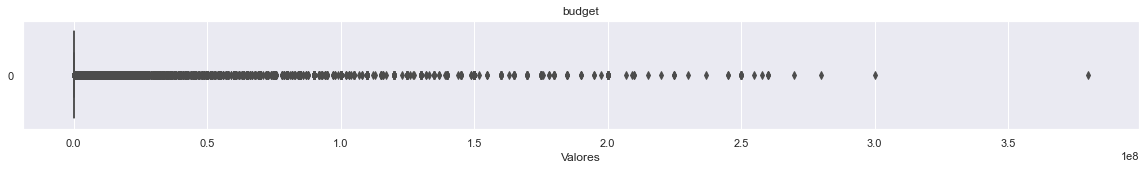

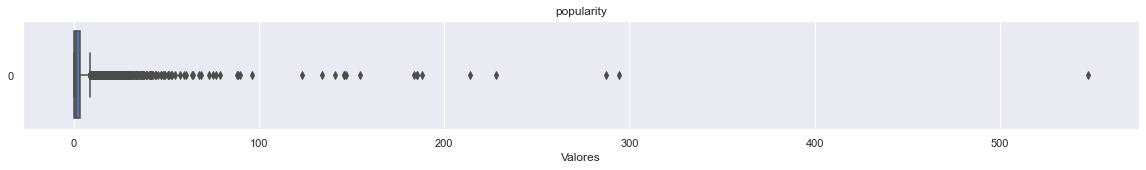

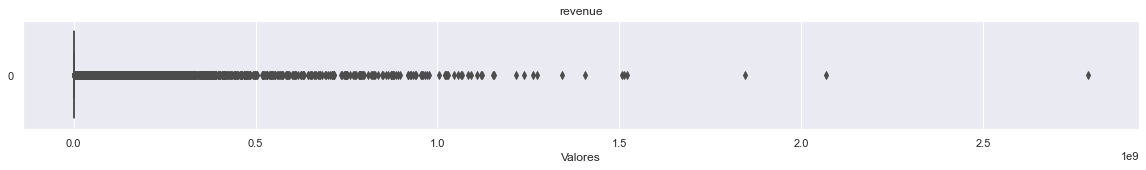

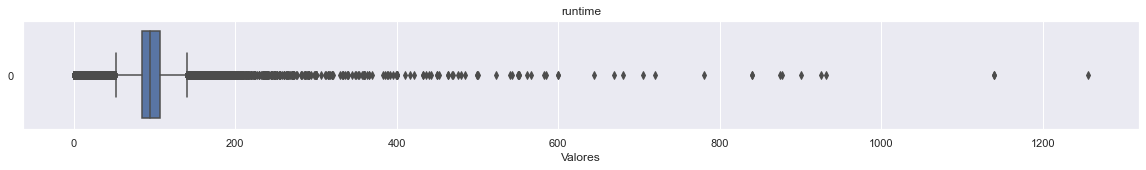

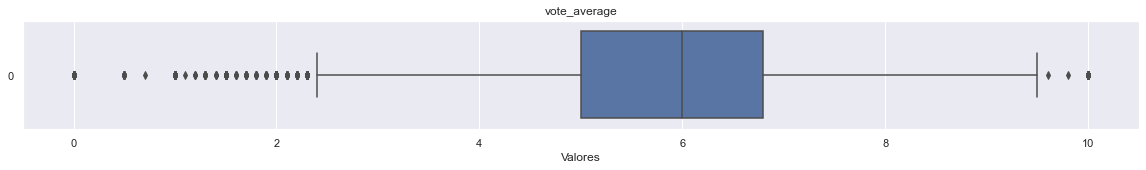

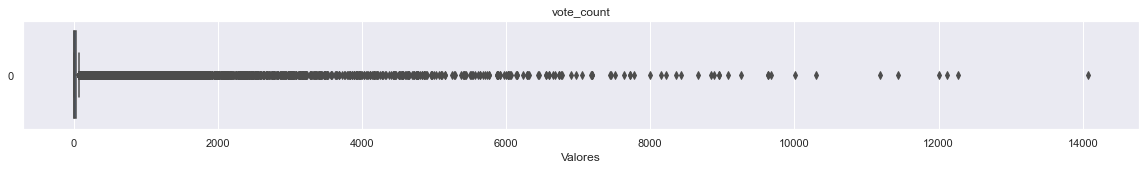

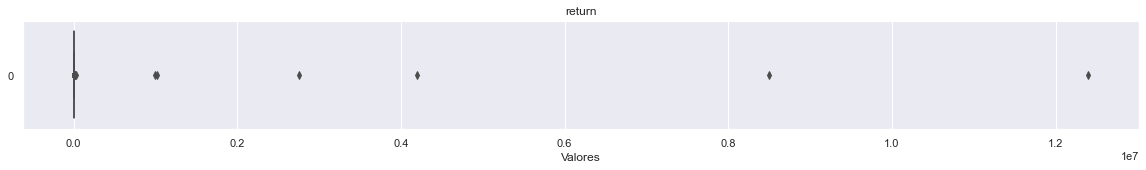

In [20]:
# Grafica un bloxplot por cada columna
for a in df_numerical.columns:
    if not df_numerical.empty:
        boxplot(df_numerical[a])

Todas las columnas tiene outiers y a excepcion de "vote_average" que tambien los tiene, pero sus valores no estan demaciado alejados entre si.

Se procede a analizar las columnas con outliers:

La columnas "budget", "revenue" y "return" coresponden a montos de dinero por lo que no se tendran en cuenta ya que es comun estas diferencias en la industria del cine.

Columna "runtime" o duracion de la pelicula en minutos

In [86]:
# muestra el valor maximo de la columa 'runtime' del dataframe 'df'
df['runtime'].max()

1256.0

La columna runtime contiene un valor maximo de 1256 minutos lo que es algo atipico ya que serian 20hs de duracion.

In [100]:
# se filtran las filas donde los volores de la columna "runtime" sean mayores a 420 minutos o 7 horas de pelicula
df[df['runtime'] > 420][['title','runtime','release_year']].sort_values('runtime', ascending=False)

,title,runtime,release_year
24275,Centennial,1256.0,1978
32095,Baseball,1140.0,1994
33253,Jazz,1140.0,2001
18849,Berlin Alexanderplatz,931.0,1980
24272,Heimat: A Chronicle of Germany,925.0,1984
31935,The Story of Film: An Odyssey,900.0,2011
33768,Taken,877.0,2002
36782,The War,874.0,2007
15768,Seventeen Moments in Spring,840.0,1973
40718,The Roosevelts: An Intimate History,840.0,2014


Buscando por internet algunos de los nombres encontramos que las de mayor duracion corresponden a series de television o a trilogias completas de peliculas por lo que no se modificaran los valores.

In [87]:
# Muestra el valor minimo de la columna 'runtime'.
df['runtime'].min()

0.0

La columna runtime contiene un valor minimo de 0.0 minutos lo que representa la ausencia del dato.

In [101]:
df['popularity'].max()

547.488298

Columna popularity

In [120]:
# se filtran las filas donde los volores de la columna "popularity" sean mayores a 100 ya que es el valor maximo segun la pagina web TMDB
df[df['popularity'] > 100][['title','popularity','release_year','runtime']].sort_values('popularity', ascending=False)

,title,popularity,release_year,runtime
36929,Minions,547.488298,2015,91.0
40934,Wonder Woman,294.337037,2017,141.0
41753,Beauty and the Beast,287.253654,2017,129.0
42528,Baby Driver,228.032744,2017,113.0
35319,Big Hero 6,213.849907,2014,102.0
40723,Deadpool,187.860492,2016,108.0
40194,Guardians of the Galaxy Vol. 2,185.330992,2017,137.0
9062,Avatar,185.070892,2009,162.0
38267,John Wick,183.870374,2014,101.0
36863,Gone Girl,154.801009,2014,145.0


Segun la pagina web de TMDB la popularidad maxima es de 100 por lo que los valores mayores son datos atipicos.

In [121]:
df_temp = pd.read_csv('../Dataset/tmdb-movies.csv',delimiter=',')
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [116]:
df_temp[df_temp['original_title'] == 'Wonder Woman']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1576,15359,tt1186373,0.492691,0,0,Wonder Woman,Keri Russell|Nathan Fillion|Alfred Molina|Rosa...,http://warnervideo.com/wonderwomanmovie/,Lauren Montgomery,Courageous princess. Fierce warrior. Legendary...,...,"On the mystical island of Themyscira, a proud ...",74,Action|Adventure|Animation|Science Fiction,DC Comics|Warner Bros. Animation,3/3/09,56,7.2,2009,0.0,0.0


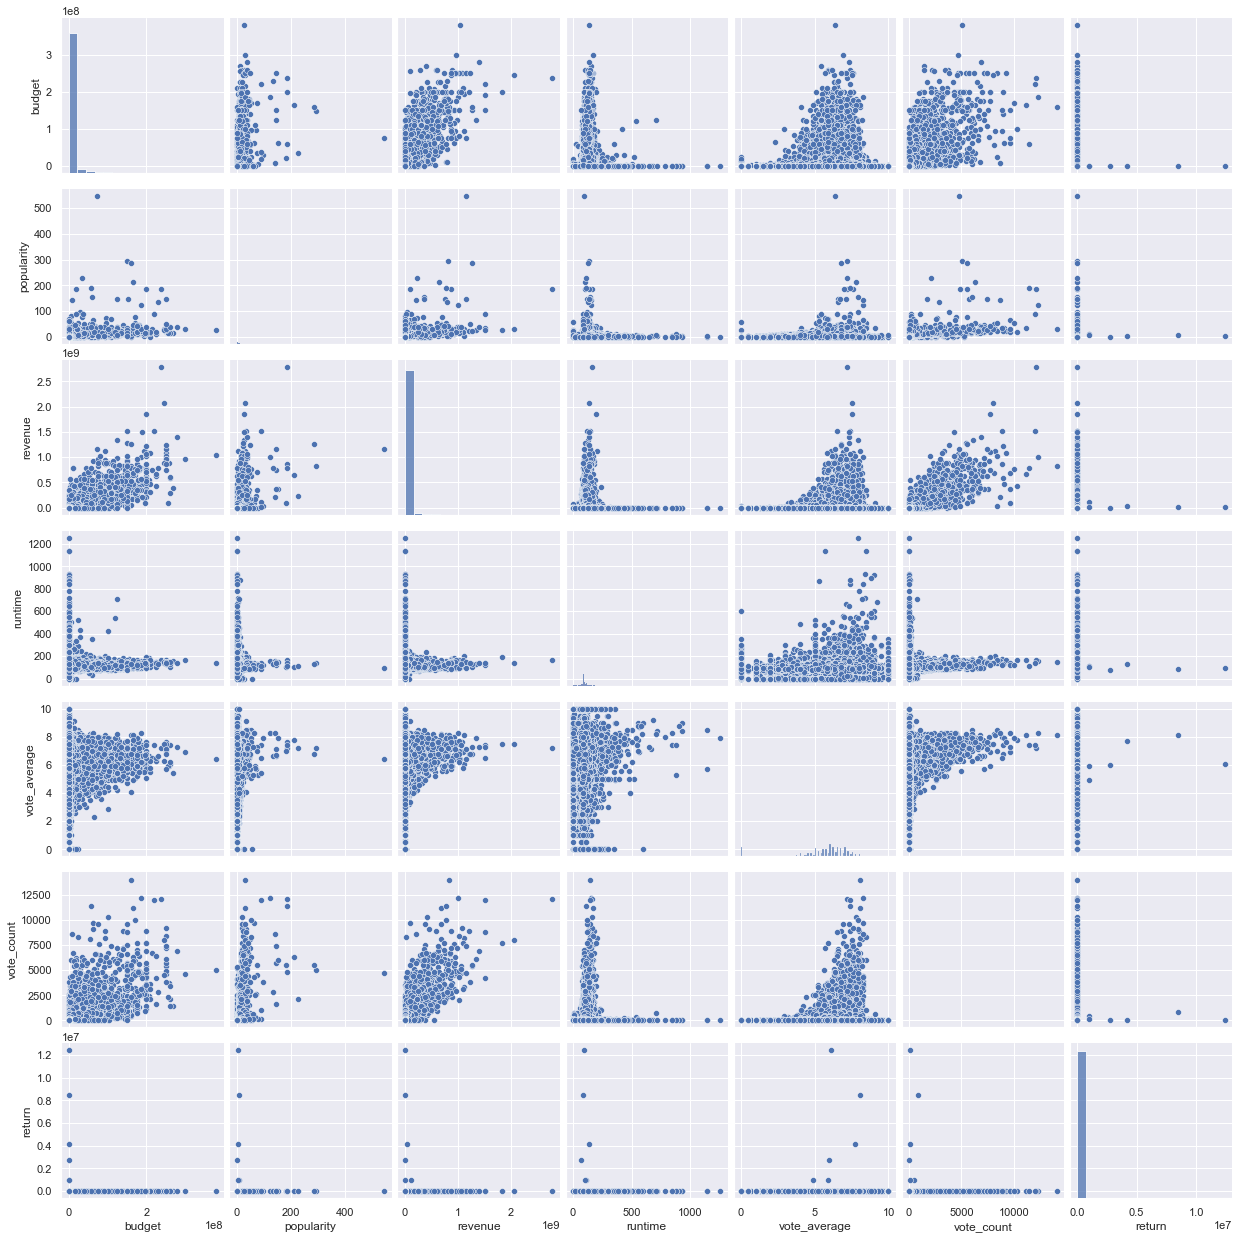

In [21]:
sns.pairplot(df_numerical)

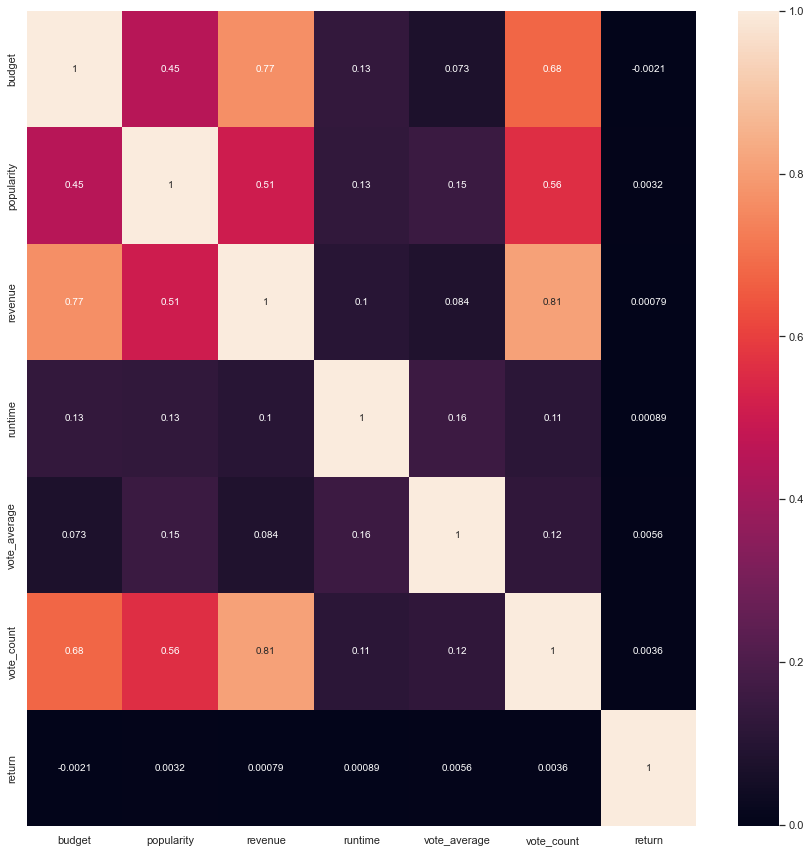

In [123]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df_numerical.corr(), annot = True)
plt.show()

Se puede observar que los columnas con mayor correlacion son budget, popularity, revenue, vote_count.

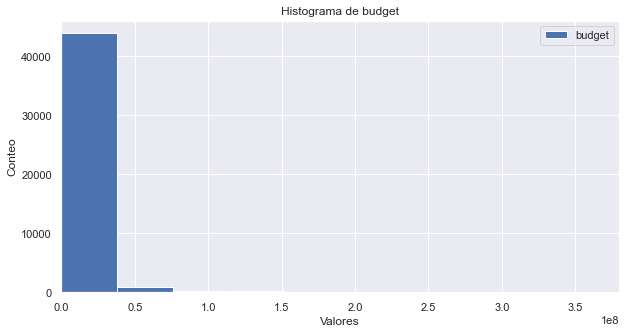

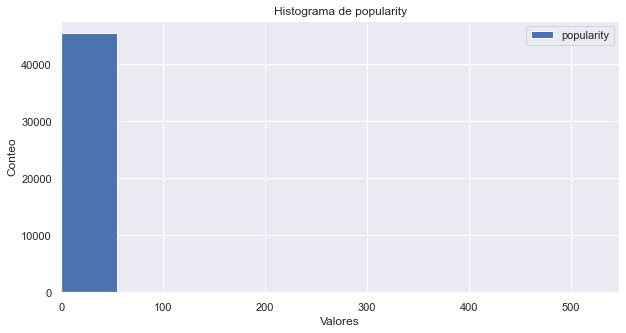

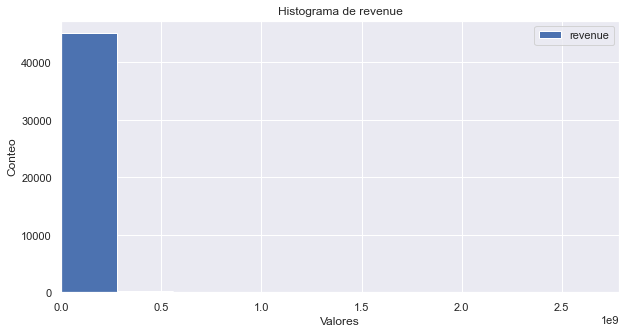

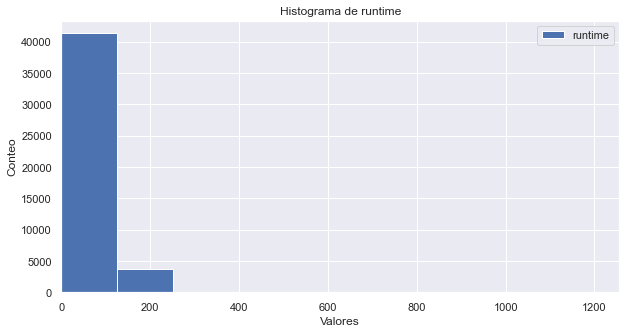

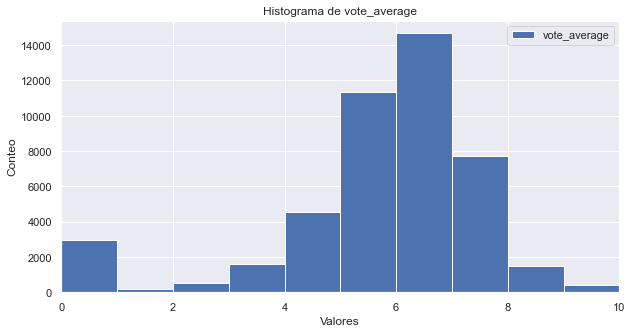

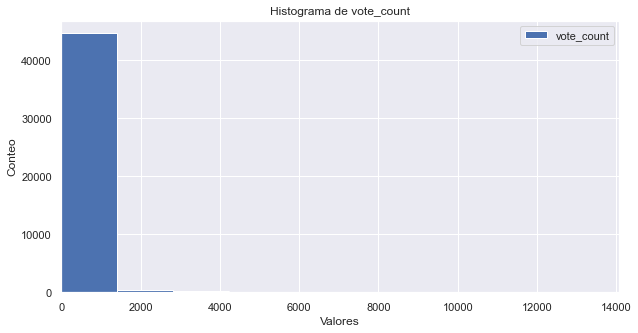

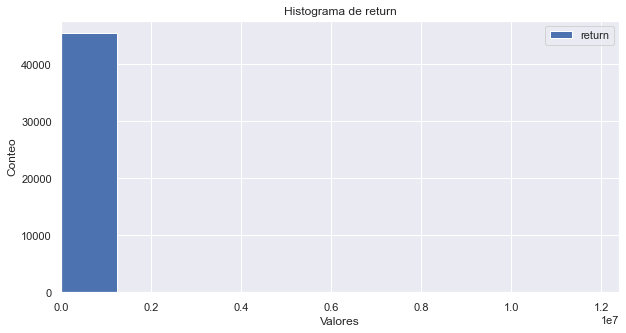

In [79]:
columnas = df_numerical.columns

for columna in columnas:
    plt.figure(figsize=(10, 5))
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valores')
    plt.ylabel('Conteo')
    plt.hist(df_numerical[columna], label=columna, bins=10)
    x_min = df_numerical[columna].min()
    x_max = df_numerical[columna].max()
    plt.xlim(x_min, x_max)
    plt.legend()
    plt.show()

Los histogramas de las columnas con valores numeros muestran que solo de la columna 'vote_average' ya que no contiene valores demasiado cercanos en la escala.
En el historigrama de 'vote_average' se puede observar que el promedio que mas conteos tiene son los promedios de votos de 6 a 7.

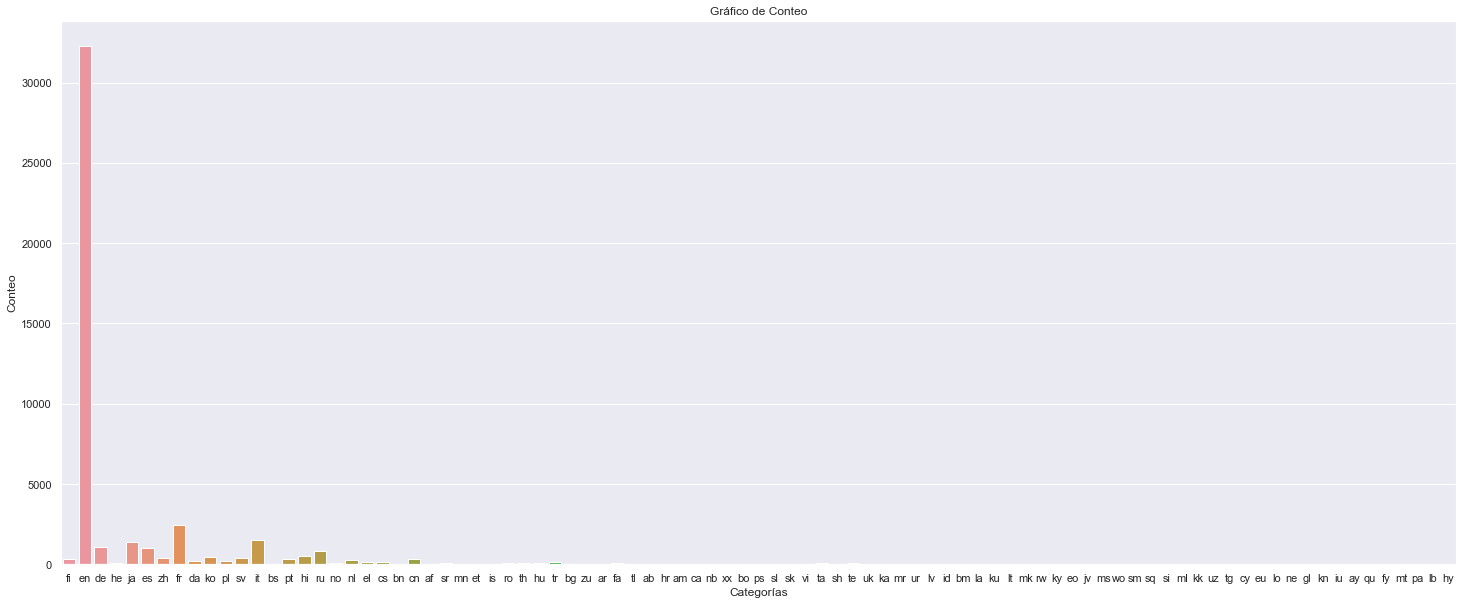

In [55]:
plt.figure(figsize = (25,10))
sns.countplot(x='original_language' ,data=df)
plt.xlabel('Categorías')
plt.ylabel('Conteo')
plt.title('Gráfico de Conteo')
plt.show()

Se observa lo predecible teiniendo en cuenta la industria del cine en EEUU, la dominancia de las peliculas con lenguaje original en ingles.